# Comparing points scored by quarter

Now that we have compiled all of the team stats for the 2017-18 regular season of the Warriors, we can do analysis on these stats. In this notebook, we will do a few visualizations of points scored by quarter. We will see that the Warriors score the most points in the third quarter and the least points in the fourth quarter.

In [1]:
% matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set(style='white')

In [2]:
#store csv as DataFrame (indices as game numbers)
warriors_team_stats = pd.read_csv('2018-regular-warriors', index_col='Unnamed: 0')

We first store and display the summary statistics for the regular season.

In [3]:
summary_statistics = warriors_team_stats.describe()

warriors_team_stats.describe()

,1st Qtr Points,2nd Qtr Points,3rd Qtr Points,4th Qtr Points,Total Points,FG Made,FG Attempted,Field Goal %,3PT Made,3PT Attempted,...,Blocks,Total Turnovers,Points Off Turnovers,Fast Break Points,Points in Paint,Personal Fouls,Technical Fouls,Flagrant Fouls,Number of OT Periods,Won?
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,...,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,29.048780,27.987805,30.219512,25.817073,113.463415,42.792683,85.121951,50.346341,11.292683,28.902439,...,7.463415,15.426829,18.536585,19.304878,43.975610,19.597561,0.829268,0.024390,0.024390,0.707317
std,5.788244,6.181402,6.751359,5.650583,14.121339,5.658464,5.926276,6.331505,3.649752,5.984774,...,2.986369,3.631245,6.554981,8.610486,8.470684,3.606783,1.075024,0.155207,0.155207,0.457794
min,16.000000,13.000000,16.000000,11.000000,75.000000,30.000000,72.000000,34.900000,3.000000,15.000000,...,0.000000,7.000000,3.000000,2.000000,26.000000,13.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,24.000000,25.250000,22.250000,106.000000,39.000000,81.000000,46.075000,9.000000,24.250000,...,6.000000,13.000000,15.000000,14.000000,38.000000,17.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,27.000000,31.000000,26.000000,114.000000,43.000000,85.000000,51.100000,11.000000,29.500000,...,7.000000,15.500000,18.000000,19.000000,44.000000,19.000000,0.500000,0.000000,0.000000,1.000000
75%,33.000000,32.750000,35.500000,30.000000,124.000000,47.000000,89.000000,55.150000,13.000000,33.000000,...,9.000000,17.000000,22.000000,23.750000,49.500000,23.000000,1.000000,0.000000,0.000000,1.000000
max,43.000000,45.000000,47.000000,37.000000,143.000000,55.000000,107.000000,62.500000,21.000000,41.000000,...,16.000000,26.000000,38.000000,48.000000,70.000000,28.000000,5.000000,1.000000,1.000000,1.000000


## Comparing quarters

The first question one could ask (since it is the content of the first four columns) is: Are there quarters during which the Warriors score more?

We will first make aligned rugplots to compare the points scored in the four quarters.

In [4]:
points_titles = ['1st Qtr Points', '2nd Qtr Points', '3rd Qtr Points', '4th Qtr Points']

#4 arrays for 4 quarters (points scored in each quarter of each game)
points_by_quarters = []

for ttl in points_titles:
    points_by_quarters.append(warriors_team_stats.loc[:,ttl].as_matrix())

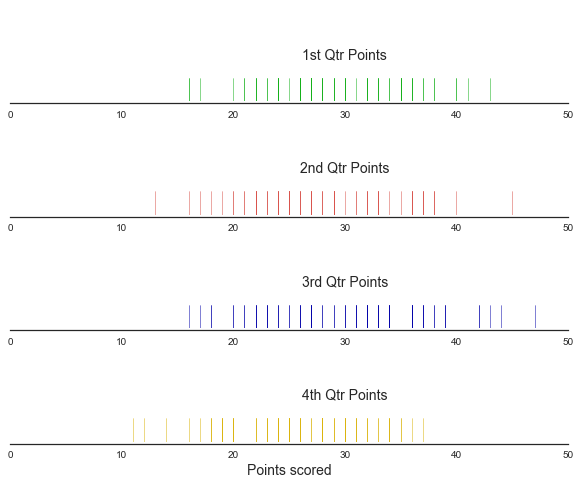

In [5]:
fig, axs = plt.subplots(figsize=(10,8), nrows=4, ncols=1, sharex=True)

#Different colors for plots
clr = [sns.xkcd_rgb['green'], sns.xkcd_rgb['pale red'], sns.xkcd_rgb['royal blue'], sns.xkcd_rgb['gold']]

for idx, points in enumerate(points_by_quarters):
    
    # Rugplot, with set rug height, thickness, and color
    sns.rugplot(ax=axs[idx], a=points, height=0.25, lw=0.5, c = clr[idx])
    
    #no y-axis
    axs[idx].set_yticks([])
    
    #Define x-axis limits and labels
    axs[idx].set_xlim(0,50)
    axs[idx].set_xlabel('Points scored', fontsize=14)
    
    #title each plot
    axs[idx].text(30, 0.45, points_titles[idx], ha='center', fontsize=14)
    
    sns.despine(ax=axs[idx], left=True, offset=2, trim=True)

From these plots, it appears that the Warriors score the most points in the third quarter and the least points in the third quarter (on average). This might be easier to see with side-by-side boxplots.

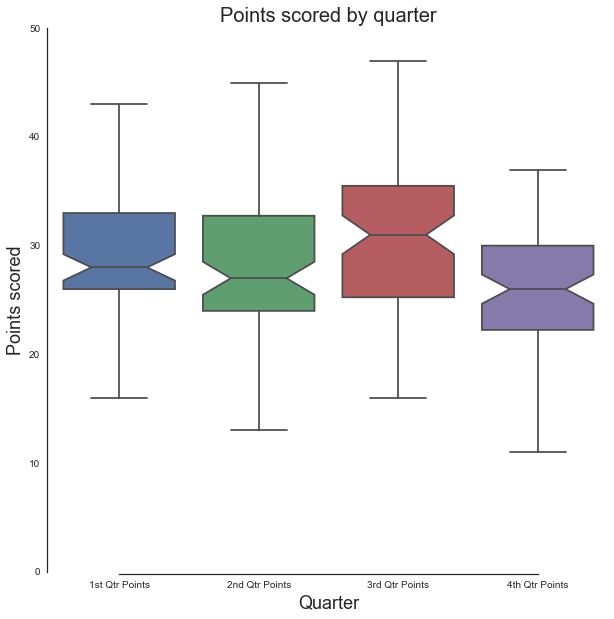

In [6]:
fig, axs = plt.subplots(figsize=(10,10))

#boxplot of points by quarters
sns.boxplot(ax=axs, data=warriors_team_stats.loc[:,'1st Qtr Points':'4th Qtr Points'], notch=True)

axs.set_ylim(0,50)
axs.set_xlabel('Quarter', fontsize=18)
axs.set_ylabel('Points scored', fontsize=18)

axs.set_title('Points scored by quarter', ha='center', fontsize=20)

sns.despine(ax=axs, offset=2, trim=True)

The boxplots more clearly show that the Warriors score the most in the third quarter. What's surprising is how much more. We see that the median of points scored in the third quarter (31) is greater than the 25 percentile of points scored in the fourth quarter (30) and is near the 75 percentiles for the first quarter (33) and second quarter (32.75). 

We next create a swarmplot to visualize the differences in scoring.

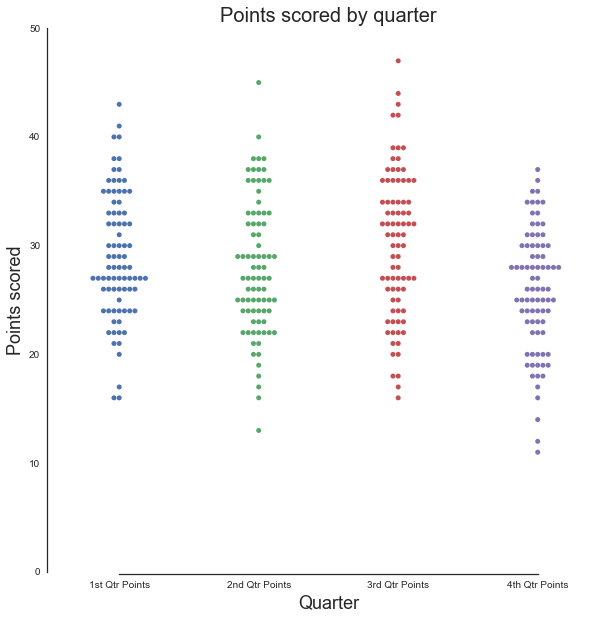

In [7]:
fig, axs = plt.subplots(figsize=(10,10))

#multiple swarmplots of points scored by quarter
sns.swarmplot(ax=axs, data=warriors_team_stats.loc[:,'1st Qtr Points':'4th Qtr Points'])

axs.set_ylim(0,50)
axs.set_xlabel('Quarter', fontsize=18)
axs.set_ylabel('Points scored', fontsize=18)

axs.set_title('Points scored by quarter', ha='center', fontsize=20)

sns.despine(ax=axs, offset=2, trim=True)

We finally compare scoring by quarters with side-by-side histograms. As it's a little busy, we will then compare the third and fourth quarters side-by-side, the highest and lowest scoring quarters, respectively.

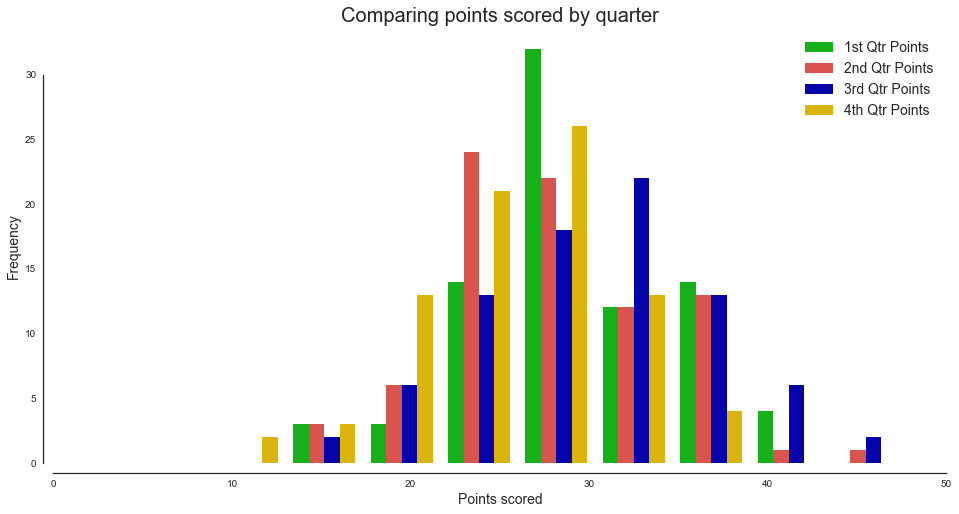

In [8]:
fig, ax = plt.subplots(figsize=(16,8))

mybins = np.linspace(0,52,13)

#side-by-side histograms of points scored by quarter
ax.hist(points_by_quarters, bins=mybins, histtype='bar', label=points_titles, color=clr)

ax.set_title('Comparing points scored by quarter', fontsize=20)

ax.set_xlim(0,50)
ax.set_xlabel('Points scored', fontsize=14)

ax.set_ylabel('Frequency', fontsize=14)

ax.legend(fontsize=14)

sns.despine(offset=10, trim=True)


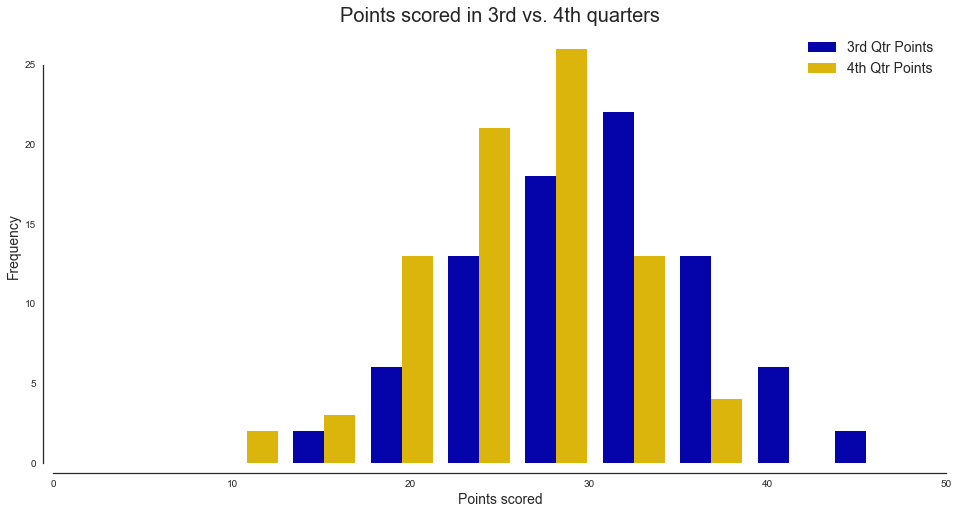

In [9]:
fig, ax = plt.subplots(figsize=(16,8))

mybins = np.linspace(0,52,13)

third_fourth_scoring = [points_by_quarters[2], points_by_quarters[3]]

#histograms of scoring in third and fourth quarters
ax.hist(third_fourth_scoring, bins=mybins, histtype='bar', label=['3rd Qtr Points', '4th Qtr Points'], color=[clr[2], clr[3]])

ax.set_title('Points scored in 3rd vs. 4th quarters', fontsize=20)

ax.set_xlim(0,50)
ax.set_xlabel('Points scored', fontsize=14)

ax.set_ylabel('Frequency', fontsize=14)

ax.legend(fontsize=14)

sns.despine(offset=10, trim=True)